In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist.keys()

X, y = mnist["data"], mnist["target"]

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


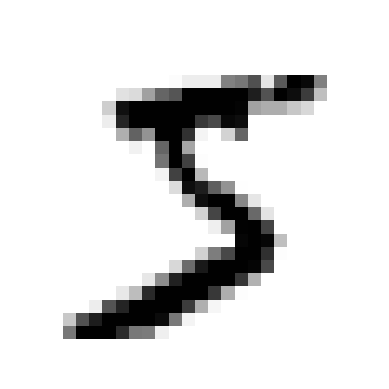

5


In [2]:
#Visualizing digit
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0:1].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y[0])

In [3]:
#Training
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
#sgd_clf.predict(some_digit)


SGDClassifier(random_state=42)

In [4]:
#Verify the score
import numpy as np
some_digit_scores = sgd_clf.decision_function(some_digit)
some_digit_scores
print(np.argmax(some_digit_scores))

print(sgd_clf.classes_)
print(sgd_clf.classes_[5])

5
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
5


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [5]:
#force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict(some_digit)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

Error Analysis

In [6]:
#Error analysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5193,    2,   71,   17,   10,   34,   46,    4,  155,   28],
       [   3, 6121,   49,    9,   14,   17,   20,    8,   30,    6],
       [  42,  109, 4896,  113,   68,   21,   93,   86,  163,   19],
       [  37,   44,  361, 4312,   26,  497,   28,   86,  224,   93],
       [  15,   31,   49,    2, 5123,    8,   39,   38,   88,  136],
       [  57,   35,   65,  173,  111, 4069,  127,   36,  298,   69],
       [  56,   33,  204,    3,   66,  122, 4925,    4,   66,    1],
       [  24,   48,   77,   18,  133,   11,    3, 5225,   44,  207],
       [  47,  216,  705,  130,  133,  446,   77,   68, 3435,  211],
       [  25,   49,   28,   58,  606,   89,    0,  320,  107, 4256]],
      dtype=int64)

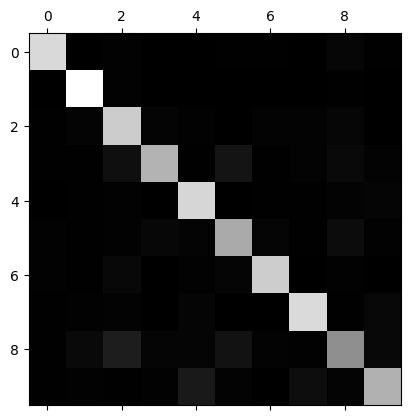

In [7]:
#Ploting confusing matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

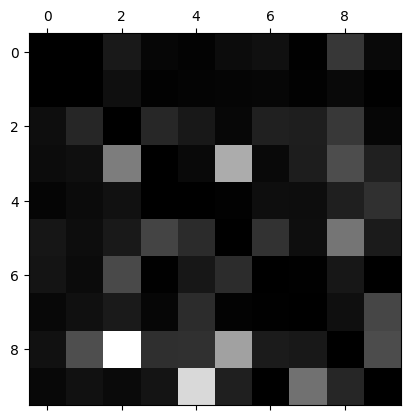

In [8]:
#Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad):
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#rows represent actual classes, while columns represent predicted classes

Multilabel Classification

In [9]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train.astype(int) >= 7)
y_train_odd = (y_train.astype(int) % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict(some_digit)


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [10]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro") #average="weighted"

0.9759770524441203

Multioutput Classification

In [11]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


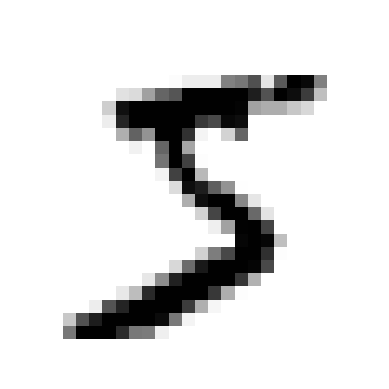

In [12]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_test_mod.iloc[0:1].values)

clean_digit = some_digit.reshape(28, 28)
plt.imshow(clean_digit, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
